In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
election_result_history_df = pd.read_csv(r"E:\IIT CHICAGO\SEMESTER_1\ONLINE SOCIAL NETWORK ANALYSIS\Project Work\DATASETS\1976-2022-house.csv")
Florida_df = election_result_history_df[election_result_history_df["state" ] == "FLORIDA"]
Fl26 = Florida_df[Florida_df["district" ] == 26]

Voter_Turnout_data = pd.read_csv(r"DATASETS\US_VEP_Turnout_Rates_v1.2.csv")

demograpic_Voter_Turnout_data = pd.read_csv(r"DATASETS\CPS_Demographic_Turnout_Rates_v1.0.csv")

Census_data = pd.read_csv(r"DATASETS\2similar districs.csv")
selected_row = Census_data.loc[[1]]

Census_data = selected_row
Census_data

,Unnamed: 0,District Name,Total Population,White Alone,Black or African American Alone,Median Household Income,Bachelor's Degree,Unemployed (16+),Below Poverty Level,Median Home Value,...,Families in Poverty,Poverty Rate (Children Under 18),Means of Transportation to Work,Workers Who Work from Home,Total Male Population,Total Female Population,Population Under 5 Years,Population 65+ Years,state,congressional district
1,109,Florida-26,771373,553664,85152,63171,104389,18043,110943,321500,...,180772,110943,365901,365901,376745,394628,22842,7206,12,26


In [4]:
Fl26.describe()

,year,state_fips,state_cen,state_ic,district,candidatevotes,totalvotes,version
count,15.000000,15.0,15.0,15.0,15.0,15.000000,15.000000,15.0
mean,2016.266667,12.0,59.0,43.0,26.0,98336.600000,249103.600000,20230706.0
std,3.614784,0.0,0.0,0.0,0.0,56334.450169,53926.862647,0.0
min,2012.000000,12.0,59.0,43.0,26.0,2717.000000,161337.000000,20230706.0
25%,2013.000000,12.0,59.0,43.0,26.0,68587.000000,218791.500000,20230706.0
50%,2016.000000,12.0,59.0,43.0,26.0,115493.000000,252957.000000,20230706.0
75%,2019.000000,12.0,59.0,43.0,26.0,139467.000000,280542.000000,20230706.0
max,2022.000000,12.0,59.0,43.0,26.0,177223.000000,342630.000000,20230706.0


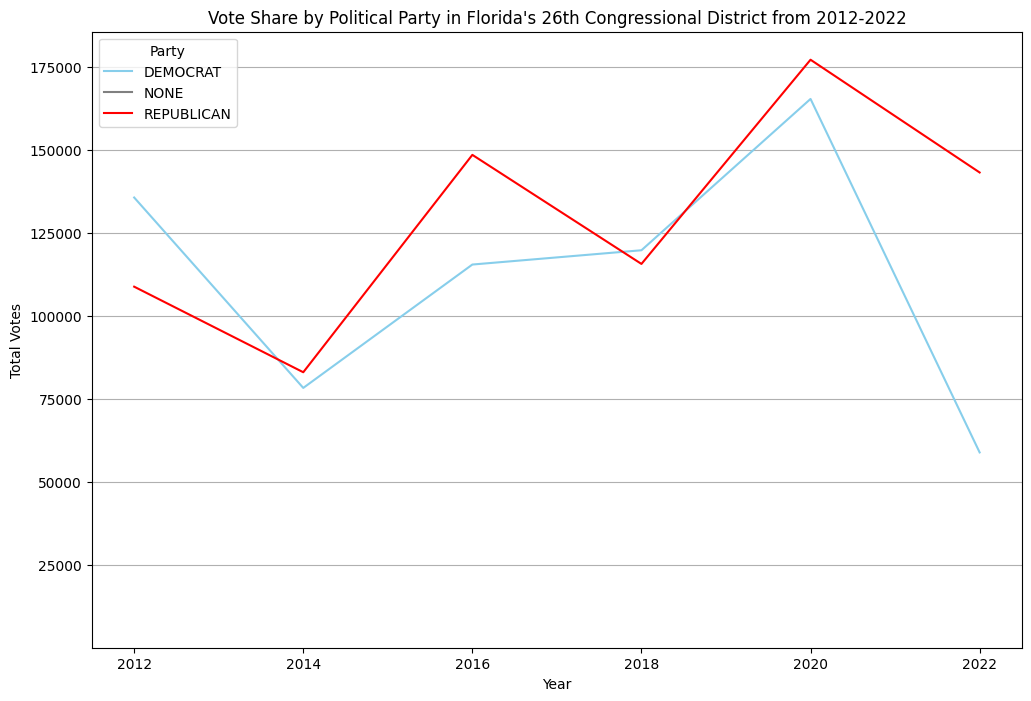

In [8]:

party_votes = Fl26.groupby(['year', 'party'])['candidatevotes'].sum().unstack()

party_colors = {'REPUBLICAN': 'red', 'DEMOCRAT': 'skyblue', 'OTHER': 'gray'}

party_votes.plot(figsize=(12, 8), color=[party_colors.get(party, 'gray') for party in party_votes.columns])
plt.title("Vote Share by Political Party in Florida's 26th Congressional District from 2012-2022")
plt.xlabel("Year")
plt.ylabel("Total Votes")
plt.legend(title="Party")
plt.grid(axis='y')
plt.show()


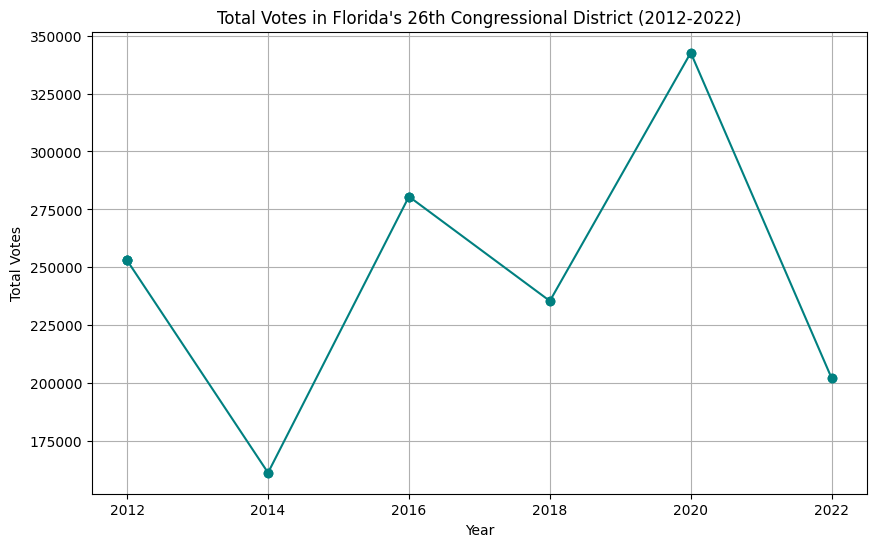

In [98]:
fl26_stats = Fl26[['year', 'candidatevotes', 'totalvotes']].describe()

# Plot the trend of total votes in Florida's 26th congressional district over time
plt.figure(figsize=(10, 6))
plt.plot(Fl26['year'], Fl26['totalvotes'], marker='o', color='teal')
plt.title("Total Votes in Florida's 26th Congressional District (2012-2022)")
plt.xlabel("Year")
plt.ylabel("Total Votes")
plt.grid(True)
plt.show()


In [14]:
Voter_Turnout_data

,YEAR,TURNOUT_RATE_PRES,TURNOUT_RATE_MIDTERM
0,1789,0.1160,NaN
1,1790,NaN,0.2160
2,1792,0.0630,NaN
3,1794,NaN,0.2500
4,1796,0.2010,NaN
...,...,...,...
113,2014,NaN,0.3670
114,2016,0.6010,NaN
115,2018,NaN,0.5005
116,2020,0.6638,NaN


In [13]:
Voter_Turnout_data.describe

<bound method NDFrame.describe of      YEAR  TURNOUT_RATE_PRES  TURNOUT_RATE_MIDTERM
0    1789             0.1160                   NaN
1    1790                NaN                0.2160
2    1792             0.0630                   NaN
3    1794                NaN                0.2500
4    1796             0.2010                   NaN
..    ...                ...                   ...
113  2014                NaN                0.3670
114  2016             0.6010                   NaN
115  2018                NaN                0.5005
116  2020             0.6638                   NaN
117  2022                NaN                0.4612

[118 rows x 3 columns]>

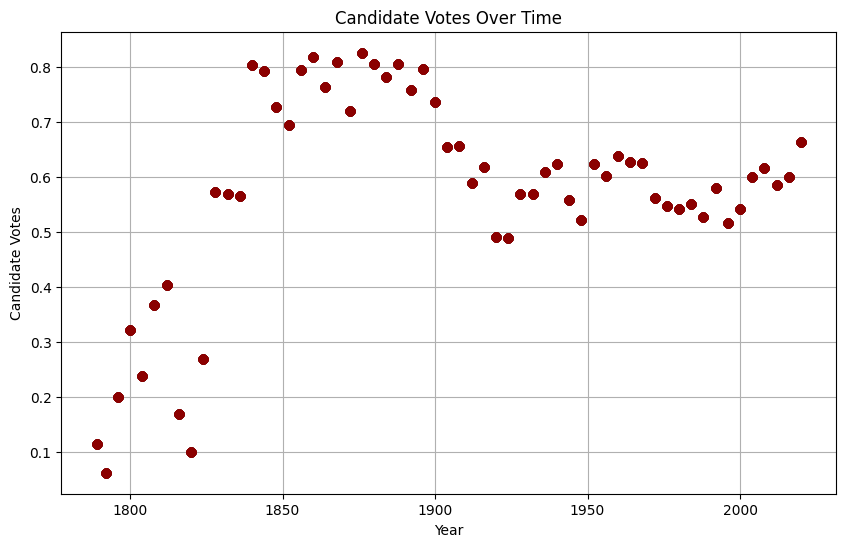

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(Voter_Turnout_data['YEAR'], Voter_Turnout_data[['TURNOUT_RATE_PRES']*100], marker='o', color='darkred')
plt.title("Candidate Votes Over Time")
plt.xlabel("Year")
plt.ylabel("Candidate Votes")
plt.grid(True)
plt.show()

In [19]:
demograpic_Voter_Turnout_data.describe

<bound method NDFrame.describe of     YEAR  CPS_ADJ_NHWHITE_RATE  CPS_ADJ_NHBLACK_RATE  CPS_ADJ_HISPANIC_RATE  \
0   2022                0.5284                0.4064                 0.3054   
1   2020                0.7257                0.6563                 0.5253   
2   2018                0.5521                0.5131                 0.3688   
3   2016                0.6468                0.5986                 0.4491   
4   2014                0.4077                0.3638                 0.2112   
5   2012                0.6180                0.6740                 0.4310   
6   2010                0.4500                0.4160                 0.2660   
7   2008                0.6520                0.6910                 0.4650   
8   2006                0.4470                0.3660                 0.2550   
9   2004                0.6430                0.6140                 0.4290   
10  2002                0.4270                0.3770                 0.2550   
11  2000          

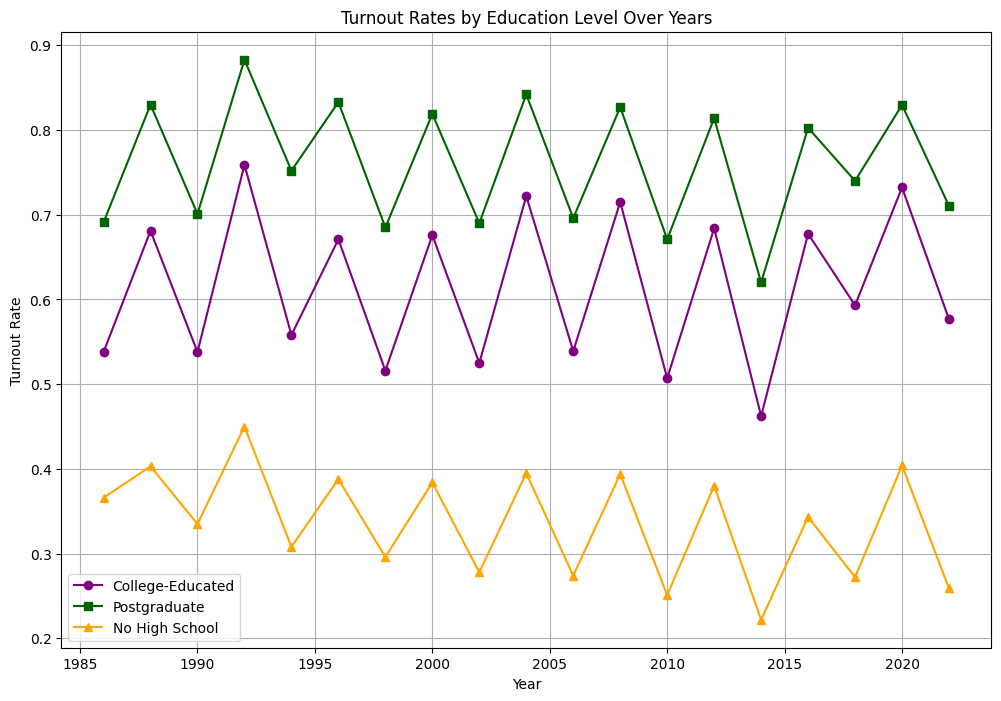

In [48]:
plt.figure(figsize=(12, 8))
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_UNADJ_COLLEGE_RATE'], label='College-Educated', marker ="o", color='purple')
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_UNADJ_POST_RATE'], label='Postgraduate',marker ="s", color='darkgreen')
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_UNADJ_NOHS_RATE'], label='No High School',marker ="^", color='orange')
plt.title("Turnout Rates by Education Level Over Years")
plt.xlabel("Year")
plt.ylabel("Turnout Rate")
plt.legend()
plt.grid(True)
plt.show()


In [28]:
demograpic_Voter_Turnout_data.head()

,YEAR,CPS_ADJ_NHWHITE_RATE,CPS_ADJ_NHBLACK_RATE,CPS_ADJ_HISPANIC_RATE,CPS_ADJ_OTHER_RATE,CPS_ADJ_NHWHITE_SHARE,CPS_ADJ_NHBLACK_SHARE,CPS_ADJ_HISPANIC_SHARE,CPS_ADJ_OTHER_SHARE,CPS_UNADJ_NHWHITE_RATE,...,CPS_ADJ_COLLEGE_SHARE,CPS_ADJ_POST_SHARE,CPS_UNADJ_NOHS_RATE,CPS_UNADJ_HS_RATE,CPS_UNADJ_COLLEGE_RATE,CPS_UNADJ_POST_RATE,CPS_UNADJ_NOHS_SHARE,CPS_UNADJ_HS_SHARE,CPS_UNADJ_COLLEGE_SHARE,CPS_UNADJ_POST_SHARE
0,2022,0.5284,0.4064,0.3054,0.3425,0.7388,0.1114,0.0945,0.0553,0.5764,...,0.5616,0.1795,0.2589,0.4045,0.5766,0.7104,0.0356,0.2230,0.5606,0.1808
1,2020,0.7257,0.6563,0.5253,0.5976,0.7124,0.1220,0.1061,0.0595,0.7094,...,0.5582,0.1538,0.4041,0.5546,0.7322,0.8296,0.0458,0.2422,0.5579,0.1541
2,2018,0.5521,0.5131,0.3688,0.3969,0.7326,0.1222,0.0940,0.0512,0.5747,...,0.5659,0.1649,0.2722,0.4208,0.5931,0.7400,0.0422,0.2272,0.5654,0.1652
3,2016,0.6468,0.5986,0.4491,0.4625,0.7363,0.1234,0.0908,0.0495,0.6530,...,0.5572,0.1460,0.3433,0.5155,0.6776,0.8027,0.0508,0.2456,0.5574,0.1462
4,2014,0.4077,0.3638,0.2112,0.2448,0.7692,0.1192,0.0701,0.0415,0.4576,...,0.5491,0.1575,0.2220,0.3393,0.4624,0.6202,0.0510,0.2413,0.5492,0.1585


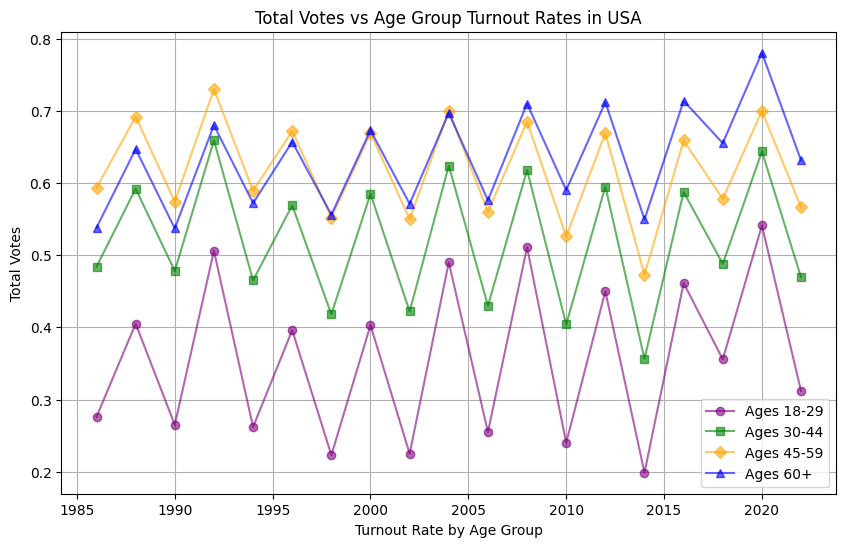

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(demograpic_Voter_Turnout_data['YEAR'],demograpic_Voter_Turnout_data['CPS_UNADJ_AGE1829_RATE'], color='purple', marker = 'o',  label='Ages 18-29', alpha=0.6)
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_UNADJ_AGE3044_RATE'], color='green',marker = 's', label='Ages 30-44', alpha=0.6)
plt.plot(demograpic_Voter_Turnout_data['YEAR'],demograpic_Voter_Turnout_data['CPS_UNADJ_AGE4559_RATE'], color='orange',marker = 'D', label='Ages 45-59', alpha=0.6)
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_ADJ_AGE60_RATE'], color='blue',marker = '^', label='Ages 60+', alpha=0.6)
plt.title("Total Votes vs Age Group Turnout Rates in USA")

plt.xlabel("Turnout Rate by Age Group")
plt.ylabel("Total Votes")
plt.legend()
plt.grid(True)
plt.show()

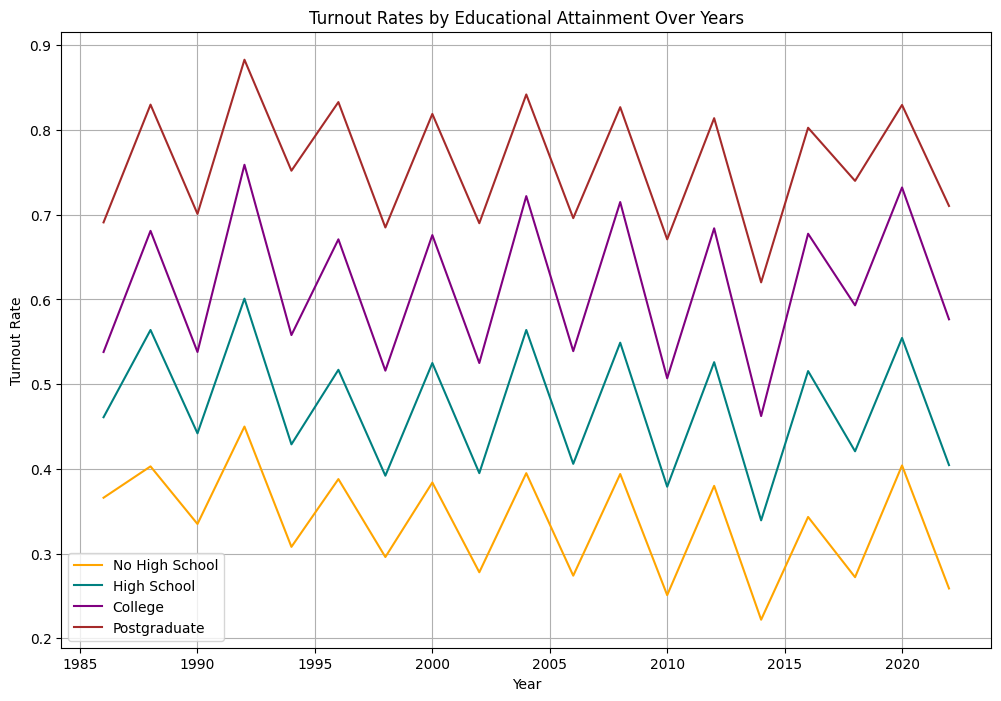

In [42]:
plt.figure(figsize=(12, 8))
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_UNADJ_NOHS_RATE'], label='No High School', color='orange')
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_UNADJ_HS_RATE'], label='High School', color='teal')
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_UNADJ_COLLEGE_RATE'], label='College', color='purple')
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_UNADJ_POST_RATE'], label='Postgraduate', color='brown')
plt.title("Turnout Rates by Educational Attainment Over Years")
plt.xlabel("Year")
plt.ylabel("Turnout Rate")
plt.legend()
plt.grid(True)
plt.show()


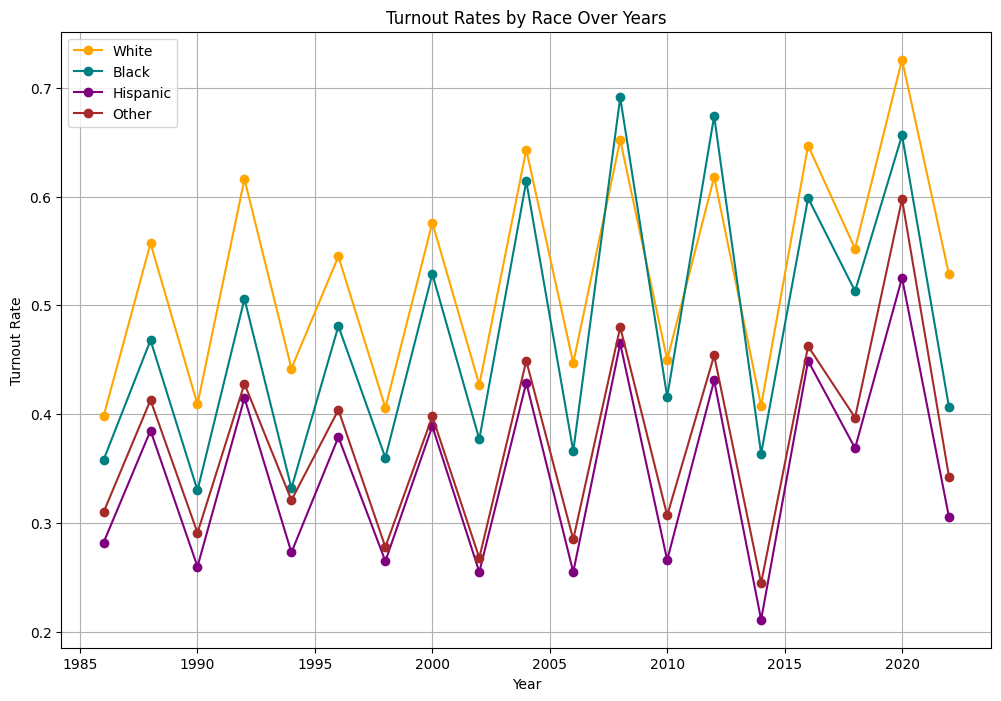

In [47]:
plt.figure(figsize=(12, 8))
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_ADJ_NHWHITE_RATE'],marker = 'o', label='White', color='orange')
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_ADJ_NHBLACK_RATE'],marker = 'o', label='Black', color='teal')
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_ADJ_HISPANIC_RATE'],marker = 'o', label='Hispanic', color='purple')
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_ADJ_OTHER_RATE'],marker = 'o', label='Other', color='brown')
plt.title("Turnout Rates by Race Over Years")
plt.xlabel("Year")
plt.ylabel("Turnout Rate")
plt.legend()
plt.grid(True)
plt.show()


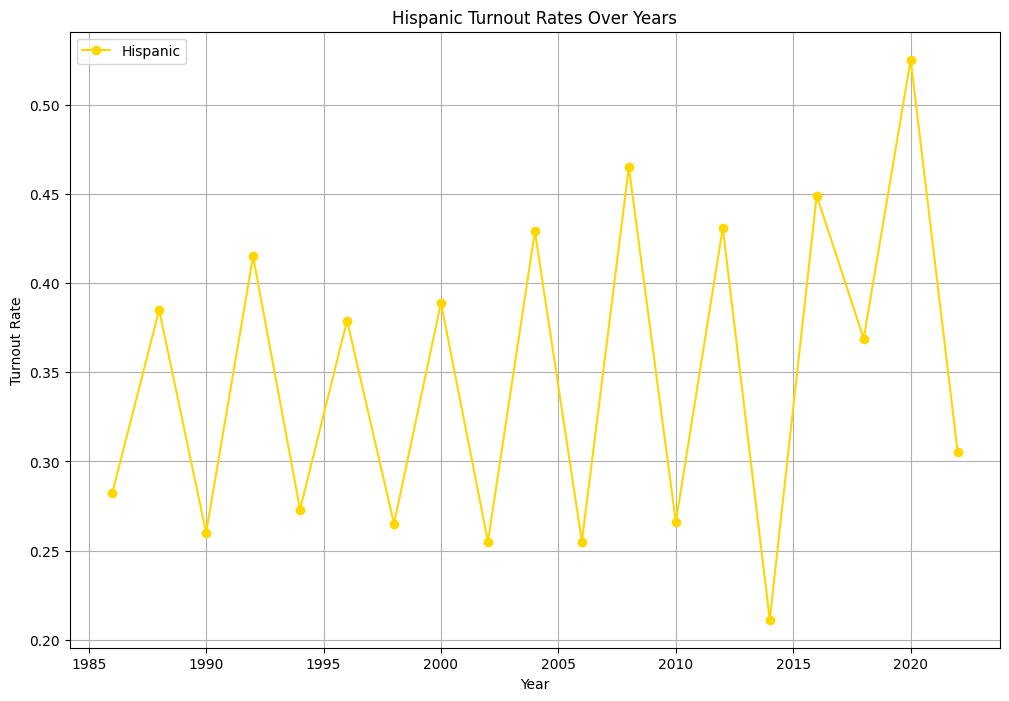

In [55]:
plt.figure(figsize=(12, 8))
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_ADJ_HISPANIC_RATE'],marker = 'o', label='Hispanic', color='gold')
plt.title("Hispanic Turnout Rates Over Years")
plt.xlabel("Year")
plt.ylabel("Turnout Rate")
plt.legend()
plt.grid(True)
plt.show()


In [56]:
demograpic_Voter_Turnout_data.columns

Index(['YEAR', 'CPS_ADJ_NHWHITE_RATE', 'CPS_ADJ_NHBLACK_RATE',
       'CPS_ADJ_HISPANIC_RATE', 'CPS_ADJ_OTHER_RATE', 'CPS_ADJ_NHWHITE_SHARE',
       'CPS_ADJ_NHBLACK_SHARE', 'CPS_ADJ_HISPANIC_SHARE',
       'CPS_ADJ_OTHER_SHARE', 'CPS_UNADJ_NHWHITE_RATE',
       'CPS_UNADJ_NHBLACK_RATE', 'CPS_UNADJ_HISPANIC_RATE',
       'CPS_UNADJ_OTHER_RATE', 'CPS_UNADJ_NHWHITE_SHARE',
       'CPS_UNADJ_NHBLACK_SHARE', 'CPS_UNADJ_HISPANIC_SHARE',
       'CPS_UNADJ_OTHER_SHARE', 'CPS_ADJ_AGE1829_RATE', 'CPS_ADJ_AGE3044_RATE',
       'CPS_ADJ_AGE4559_RATE', 'CPS_ADJ_AGE60_RATE', 'CPS_ADJ_AGE1829_SHARE',
       'CPS_ADJ_AGE3044_SHARE', 'CPS_ADJ_AGE4559_SHARE', 'CPS_ADJ_AGE60_SHARE',
       'CPS_UNADJ_AGE1829_RATE', 'CPS_UNADJ_AGE3044_RATE',
       'CPS_UNADJ_AGE4559_RATE', 'CPS_ADJ_UNAGE60_RATE',
       'CPS_ADJ_UNAGE1829_SHARE', 'CPS_ADJ_UNAGE3044_SHARE',
       'CPS_ADJ_UNAGE4559_SHARE', 'CPS_ADJ_UNAGE60_SHARE', 'CPS_ADJ_NOHS_RATE',
       'CPS_ADJ_HS_RATE', 'CPS_ADJ_COLLEGE_RATE', 'CPS_ADJ_POST_RATE'

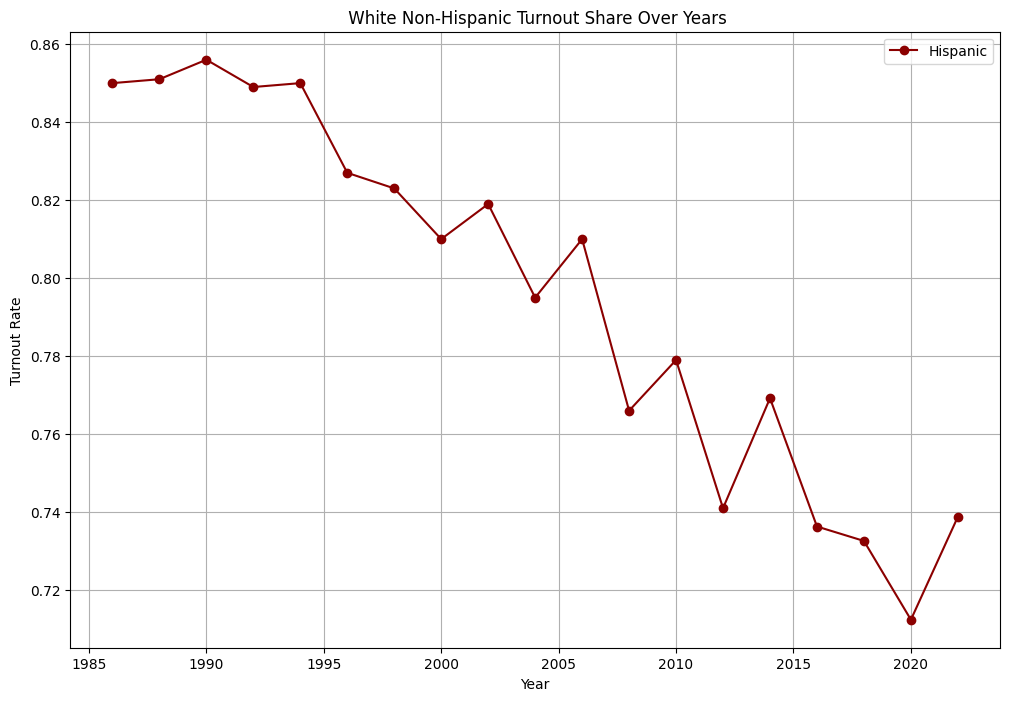

In [63]:
plt.figure(figsize=(12, 8))
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_ADJ_NHWHITE_SHARE'],marker = 'o', label='Hispanic', color='darkred')
plt.title(" White Non-Hispanic Turnout Share Over Years")
plt.xlabel("Year")
plt.ylabel("Turnout Rate")
plt.legend()
plt.grid(True)
plt.show()


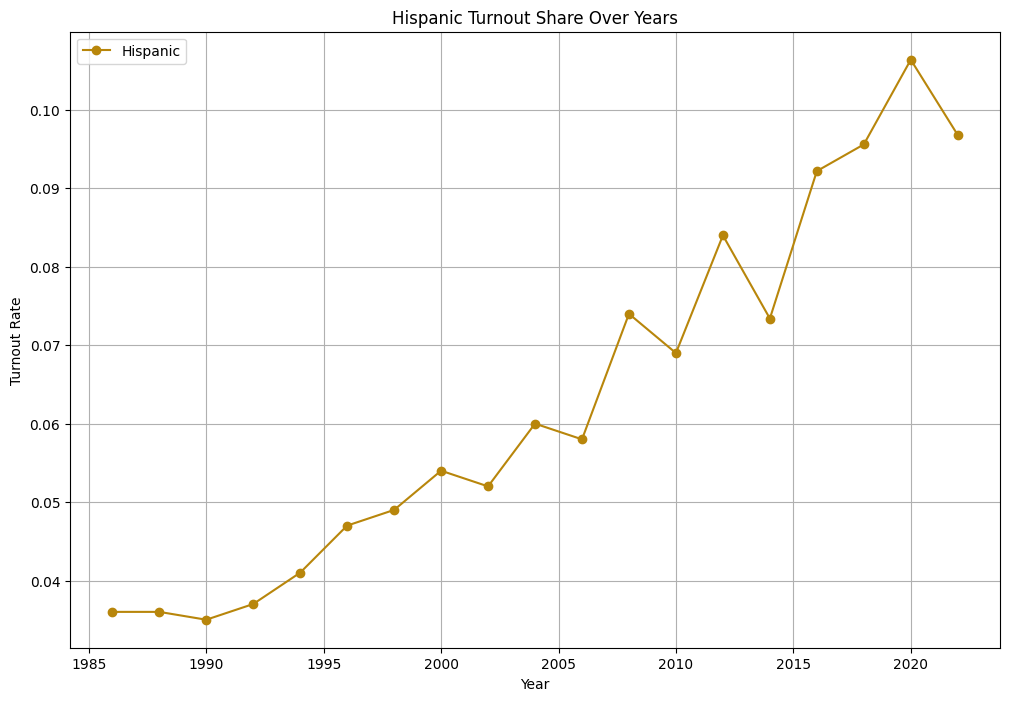

In [101]:
plt.figure(figsize=(12, 8))
plt.plot(demograpic_Voter_Turnout_data['YEAR'], demograpic_Voter_Turnout_data['CPS_UNADJ_HISPANIC_SHARE'],marker = 'o', label='Hispanic', color='darkgoldenrod')
plt.title("Hispanic Turnout Share Over Years")
plt.xlabel("Year")
plt.ylabel("Turnout Rate")
plt.legend()
plt.grid(True)
plt.show()

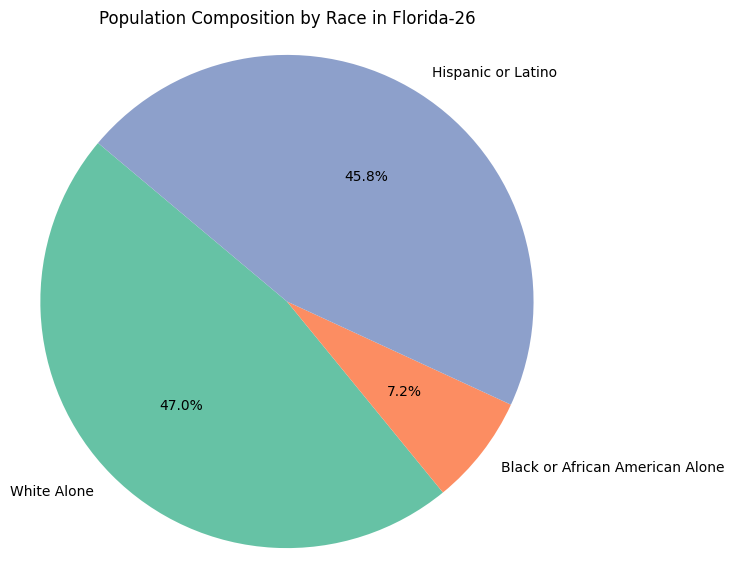

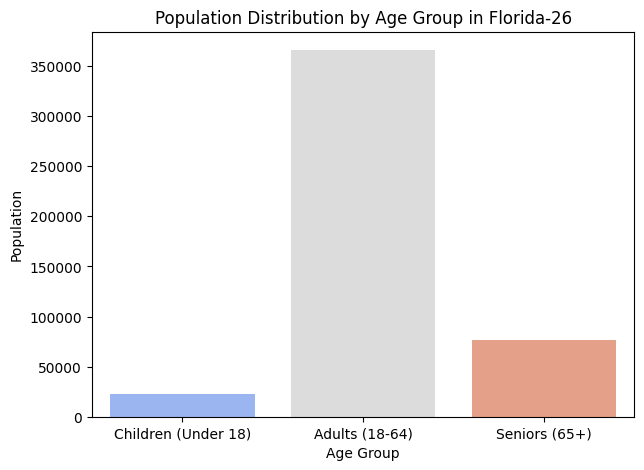

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame with the provided data
data = {
    'District Name': ['Florida-26'],
    'Total Population': [771373],
    'White Alone': [553664],
    'Black or African American Alone': [85152],
    'Median Household Income': [63171],
    'Bachelor\'s Degree': [197188],
    'Unemployed (16+)': [104389],
    'Below Poverty Level': [18043],
    'Median Home Value': [110943],
    'Total Households': [321500],
    'Median Age': [39.2],
    'Hispanic or Latino': [538926],
    'Families in Poverty': [34704],
    'Poverty Rate (Children Under 18)': [12],
    'Graduate or Professional Degree (25+)': [31261],
    'Mean Travel Time to Work': [32.1],
    'Workers Who Work from Home': [110943]
}

df = pd.DataFrame(data)

# 1. Data Visualization - Racial Demographics Pie Chart
race_labels = ['White Alone', 'Black or African American Alone', 'Hispanic or Latino']
race_sizes = [df['White Alone'][0], df['Black or African American Alone'][0], df['Hispanic or Latino'][0]]

plt.figure(figsize=(7, 7))
plt.pie(race_sizes, labels=race_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Population Composition by Race in Florida-26')
plt.axis('equal')
plt.show()

# 2. Correlation between Education, Income, and Poverty
# correlation_df = df[['Bachelor\'s Degree', 'Median Household Income', 'Below Poverty Level', 'Families in Poverty']]
# correlation_matrix = correlation_df.corr()

# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
# plt.title('Correlation Between Education, Income, and Poverty')
# plt.show()

# 3. Analyze trends - Population distribution over age groups
age_data = {
    'Age Group': ['Children (Under 18)', 'Adults (18-64)', 'Seniors (65+)'],
    'Population': [22842, 365901, 76219]  # Populations inferred based on median age and total
}

age_df = pd.DataFrame(age_data)

plt.figure(figsize=(7, 5))
sns.barplot(x='Age Group', y='Population', data=age_df, palette='coolwarm')
plt.title('Population Distribution by Age Group in Florida-26')
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.show()


In [79]:
Census_data.columns


Index(['Unnamed: 0', 'District Name', 'Total Population', 'White Alone',
       'Black or African American Alone', 'Median Household Income',
       'Bachelor's Degree', 'Unemployed (16+)', 'Below Poverty Level',
       'Median Home Value', 'Total Households', 'Median Age',
       'White Alone (Not Hispanic or Latino)',
       'Black or African American Alone (Not Hispanic or Latino)',
       'Hispanic or Latino', 'Total Housing Units', 'Occupied Housing Units',
       'Vacant Housing Units', 'Median Gross Rent',
       'Housing Unit Value Categories', 'Employed Population (16+)',
       'Occupation (Civilian Employed 16+)', 'Mean Travel Time to Work',
       'School Enrollment (3+ years)', 'High School Graduate (25+)',
       'Graduate or Professional Degree (25+)', 'Health Insurance Coverage',
       'Health Insurance by Employment (18-64)',
       'Population with a Disability (Total)',
       'Population with a Disability (Under 18)',
       'Population with a Disability (18-64)',


In [84]:
Census_data['Unemployed (16+)'] = pd.to_numeric(Census_data['Unemployed (16+)'], errors='coerce')
Census_data['Employed Population (16+)'] = pd.to_numeric(Census_data['Employed Population (16+)'], errors='coerce')

# Calculate unemployment rate
Census_data['Unemployment Rate'] = (Census_data['Unemployed (16+)'] / (Census_data['Employed Population (16+)'] + Census_data['Unemployed (16+)'])) * 100

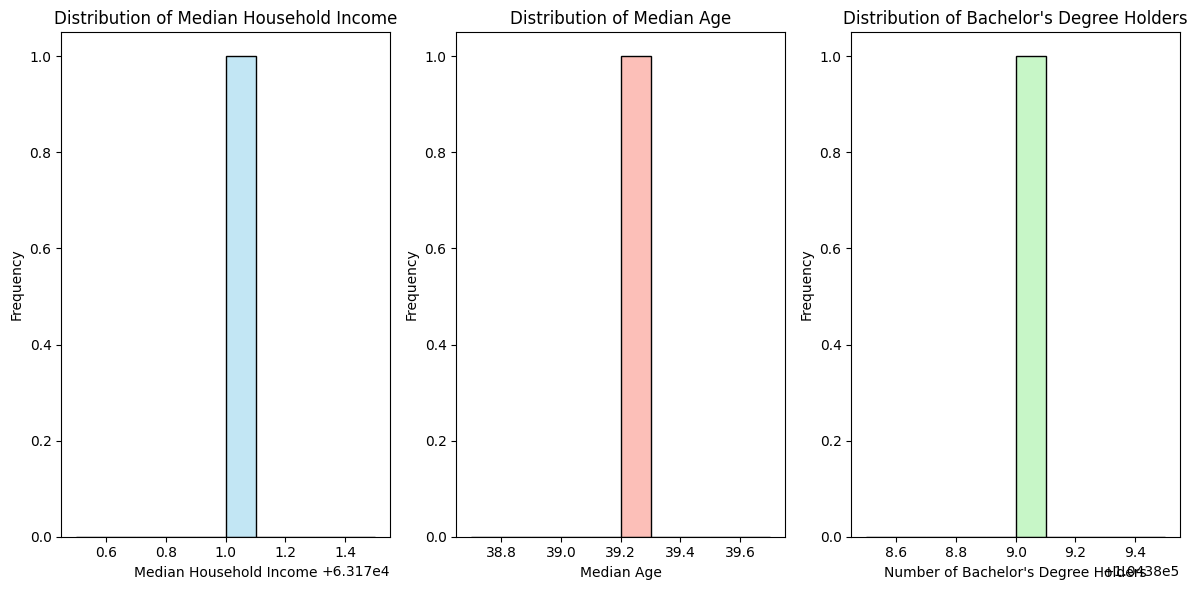

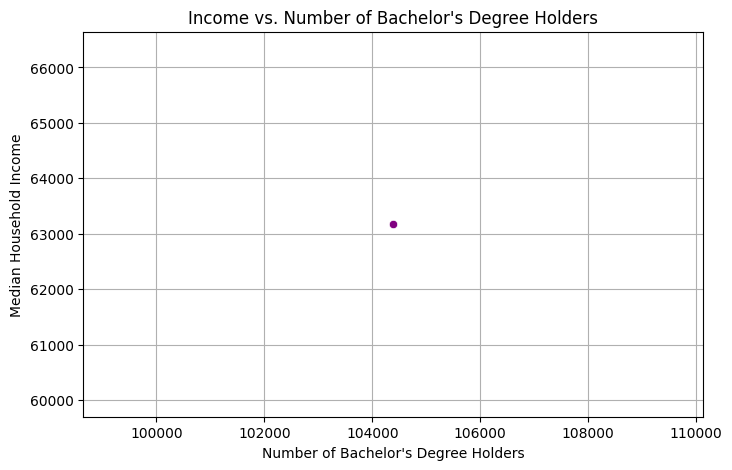

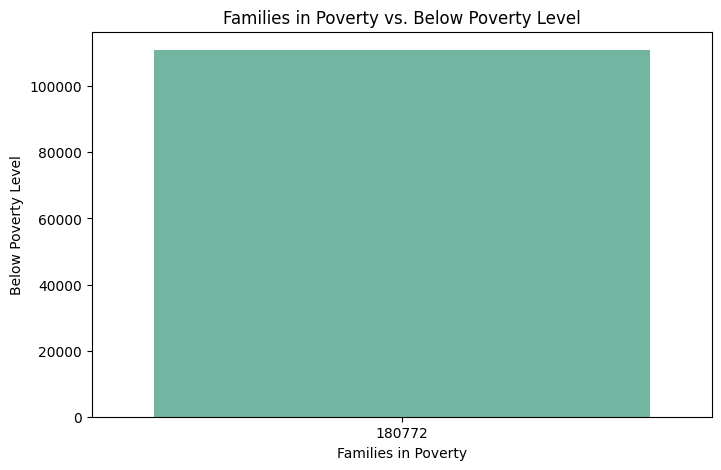

,Total Population,White Alone,Black or African American Alone,Median Household Income,Bachelor's Degree,Unemployed (16+),Below Poverty Level,Median Home Value,Total Households,Median Age,Hispanic or Latino,Families in Poverty,Poverty Rate (Children Under 18),Graduate or Professional Degree (25+),Mean Travel Time to Work,Workers Who Work from Home
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,771373.0,553664.0,85152.0,63171.0,197188.0,104389.0,18043.0,110943.0,321500.0,39.2,538926.0,34704.0,12.0,31261.0,32.1,110943.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,771373.0,553664.0,85152.0,63171.0,197188.0,104389.0,18043.0,110943.0,321500.0,39.2,538926.0,34704.0,12.0,31261.0,32.1,110943.0
25%,771373.0,553664.0,85152.0,63171.0,197188.0,104389.0,18043.0,110943.0,321500.0,39.2,538926.0,34704.0,12.0,31261.0,32.1,110943.0
50%,771373.0,553664.0,85152.0,63171.0,197188.0,104389.0,18043.0,110943.0,321500.0,39.2,538926.0,34704.0,12.0,31261.0,32.1,110943.0
75%,771373.0,553664.0,85152.0,63171.0,197188.0,104389.0,18043.0,110943.0,321500.0,39.2,538926.0,34704.0,12.0,31261.0,32.1,110943.0
max,771373.0,553664.0,85152.0,63171.0,197188.0,104389.0,18043.0,110943.0,321500.0,39.2,538926.0,34704.0,12.0,31261.0,32.1,110943.0


In [96]:
# 1. Summary Statistics
summary_stats = df.describe()

# 2. Distribution of Key Metrics
plt.figure(figsize=(12, 6))

# Histogram for Median Household Income
plt.subplot(1, 3, 1)
sns.histplot(Census_data['Median Household Income'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Median Household Income')
plt.xlabel('Median Household Income')
plt.ylabel('Frequency')

# Histogram for Age
plt.subplot(1, 3, 2)
sns.histplot(Census_data['Median Age'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Median Age')
plt.xlabel('Median Age')
plt.ylabel('Frequency')

# Histogram for Bachelor's Degree
plt.subplot(1, 3, 3)
sns.histplot(Census_data['Bachelor\'s Degree'], bins=10, kde=True, color='lightgreen')
plt.title('Distribution of Bachelor\'s Degree Holders')
plt.xlabel('Number of Bachelor\'s Degree Holders')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Income vs. Education Level
plt.figure(figsize=(8, 5))
sns.scatterplot(data=Census_data, x='Bachelor\'s Degree', y='Median Household Income', color='purple')
plt.title('Income vs. Number of Bachelor\'s Degree Holders')
plt.xlabel('Number of Bachelor\'s Degree Holders')
plt.ylabel('Median Household Income')
plt.grid()
plt.show()

# 4. Poverty Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x='Families in Poverty', y='Below Poverty Level', data=Census_data, palette='Set2')
plt.title('Families in Poverty vs. Below Poverty Level')
plt.xlabel('Families in Poverty')
plt.ylabel('Below Poverty Level')
plt.show()

summary_stats
